# Gerando dados para decision tree e random forest

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Configuração de semente para reprodutibilidade
np.random.seed(42)

# Dados básicos
idades = ['Jovem', 'Meia-idade', 'Idoso']
intensidades = ['Alta', 'Média', 'Baixa']
restrições = ['Sim', 'Não']

# Definindo probabilidades condicionais para atividades baseadas em idade, saúde e intensidade
atividades_por_idade_saude_intensidade = {
    ('Jovem', 'Não', 'Alta'): ['Corrida', 'Ciclismo'],
    ('Jovem', 'Não', 'Média'): ['Natação', 'Pilates'],
    ('Jovem', 'Não', 'Baixa'): ['Yoga', 'Pilates'],
    ('Jovem', 'Sim', 'Alta'): ['Caminhada', 'Pilates'],
    ('Jovem', 'Sim', 'Média'): ['Yoga', 'Pilates'],
    ('Jovem', 'Sim', 'Baixa'): ['Yoga'],
    ('Meia-idade', 'Não', 'Alta'): ['Ciclismo', 'Corrida'],
    ('Meia-idade', 'Não', 'Média'): ['Natação', 'Pilates'],
    ('Meia-idade', 'Não', 'Baixa'): ['Yoga'],
    ('Meia-idade', 'Sim', 'Alta'): ['Caminhada'],
    ('Meia-idade', 'Sim', 'Média'): ['Yoga', 'Pilates'],
    ('Meia-idade', 'Sim', 'Baixa'): ['Yoga'],
    ('Idoso', 'Não', 'Alta'): ['Caminhada'],
    ('Idoso', 'Não', 'Média'): ['Yoga'],
    ('Idoso', 'Não', 'Baixa'): ['Yoga', 'Pilates'],
    ('Idoso', 'Sim', 'Alta'): ['Caminhada'],
    ('Idoso', 'Sim', 'Média'): ['Yoga'],
    ('Idoso', 'Sim', 'Baixa'): ['Pilates']
}

# Função para escolher atividade baseada na idade, restrição de saúde e intensidade
def escolher_atividade(idade, restricao, intensidade):
    atividades = atividades_por_idade_saude_intensidade[(idade, restricao, intensidade)]
    return np.random.choice(atividades)

# Gerando os dados
data = {
    'Idade': [np.random.choice(idades, p=[0.3, 0.4, 0.3]) for _ in range(100)],
    'Intensidade Preferida': [np.random.choice(intensidades) for _ in range(100)],
    'Restrição de Saúde': [np.random.choice(restrições, p=[0.2, 0.8]) for _ in range(100)]
}

# Adicionando a atividade recomendada com base em idade, restrição de saúde e intensidade
data['Atividade Recomendada'] = [
    escolher_atividade(data['Idade'][i], data['Restrição de Saúde'][i], data['Intensidade Preferida'][i]) for i in range(100)
]

df = pd.DataFrame(data)
# Salvando os dados
df.to_csv('atividades_recomendadas_ajustadas.csv', index=False)


C:\Users\flavi\AppData\Local\Temp\ipykernel_15176\1702130486.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df_encoded = pd.get_dummies(df, columns=['Idade', 'Intensidade Preferida', 'Restrição de Saúde'])

# Separando os dados em atributos e etiquetas
X = df_encoded.drop('Atividade Recomendada', axis=1)
y = df['Atividade Recomendada']

# Dividindo os dados em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
df_encoded.head()

,Atividade Recomendada,Idade_Idoso,Idade_Jovem,Idade_Meia-idade,Intensidade Preferida_Alta,Intensidade Preferida_Baixa,Intensidade Preferida_Média,Restrição de Saúde_Não,Restrição de Saúde_Sim
0,Yoga,False,False,True,False,True,False,True,False
1,Yoga,True,False,False,False,True,False,True,False
2,Caminhada,True,False,False,True,False,False,False,True
3,Corrida,False,False,True,True,False,False,True,False
4,Natação,False,True,False,False,False,True,True,False


# Prevendo com Decision Tree

Profundidade: 3, Pontuação treino: 0.6666666666666666, Pontuação validação: 0.6
Profundidade: 4, Pontuação treino: 0.7166666666666667, Pontuação validação: 0.7
Profundidade: 5, Pontuação treino: 0.75, Pontuação validação: 0.65
Profundidade: 6, Pontuação treino: 0.75, Pontuação validação: 0.65
Profundidade: 7, Pontuação treino: 0.75, Pontuação validação: 0.65
Profundidade: 8, Pontuação treino: 0.75, Pontuação validação: 0.65
Profundidade: 9, Pontuação treino: 0.75, Pontuação validação: 0.65
Pontuação de Treinamento: 0.7166666666666667
Pontuação de Teste: 0.55


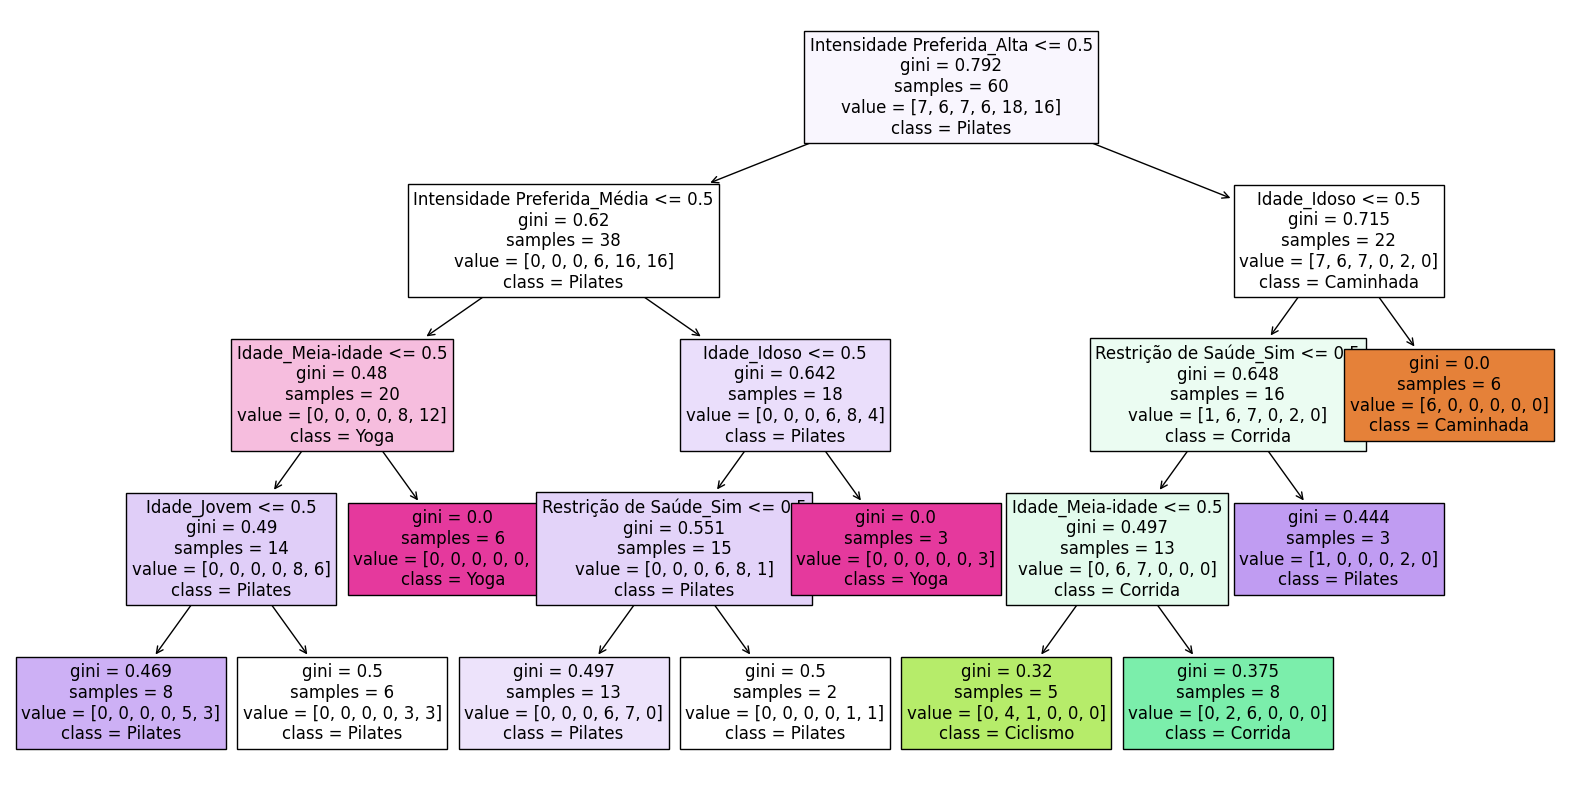

Pontuação de Teste: 0.55


In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Ajustando hiperparâmetros com o conjunto de validação
# Testando diferentes profundidades da árvore
best_score = 0
best_depth = 3
for depth in range(3, 10):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    score = model.score(X_valid, y_valid)
    print(f"Profundidade: {depth}, Pontuação treino: {model.score(X_train, y_train)}, Pontuação validação: {score}")
    if score > best_score:
        best_score = score
        best_depth = depth

# Treinando o modelo final com a melhor profundidade encontrada
model = DecisionTreeClassifier(max_depth=best_depth)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
print(f"Pontuação de Treinamento: {train_score}")

# Avaliação final no conjunto de teste
test_score = model.score(X_test, y_test)
print(f"Pontuação de Teste: {test_score}")

# Visualizando a árvore
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_, fontsize=12)
plt.show()

# Avaliando o modelo no conjunto de teste (final)
test_score = model.score(X_test, y_test)
print(f"Pontuação de Teste: {test_score}")

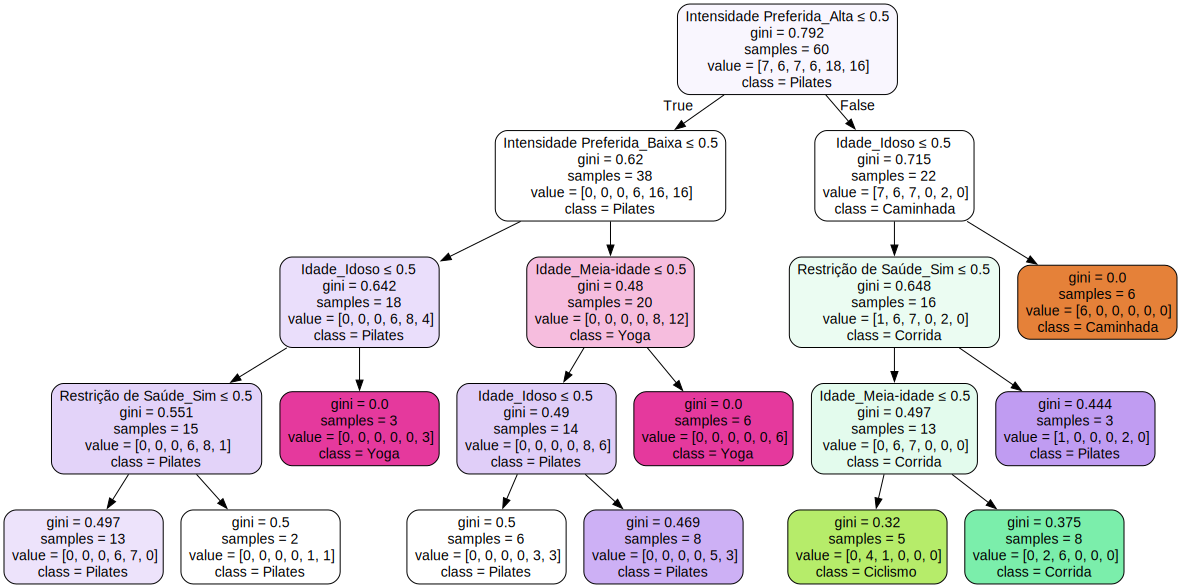

In [19]:
import graphviz
from sklearn.tree import export_graphviz

# Treinando o modelo final com a melhor profundidade encontrada
model = DecisionTreeClassifier(max_depth=best_depth)
model.fit(X_train, y_train)

# Exportando a árvore de decisão para um arquivo DOT
dot_data = export_graphviz(
    model,
    out_file=None, 
    feature_names=X.columns,
    class_names=model.classes_,
    filled=True,
    rounded=True,
    special_characters=True
)

# Usando o Graphviz para visualizar a árvore
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format='png', cleanup=True)  # Salva a árvore como PNG e limpa arquivos temporários

# Mostrando a árvore diretamente
graph

# Prevendo com Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Treinando o modelo de floresta aleatória
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avaliando o modelo no conjunto de teste
test_score = model.score(X_test, y_test)
print(f"Pontuação de Teste: {test_score}")

Pontuação de Teste: 0.65


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Treinando o modelo de floresta aleatória
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Realizando a validação cruzada
scores = cross_val_score(model, X_train, y_train, cv=5)  # cv é o número de 'folds' na validação cruzada

# Exibindo as pontuações de cada fold e a média
print(f"Pontuações de cada fold: {scores}")
print(f"Média das pontuações: {scores.mean()}")

# Avaliando o modelo no conjunto de teste
# É importante treinar o modelo novamente com todo o conjunto de treinamento antes de testá-lo.
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Pontuação de Teste: {test_score}")


Pontuações de cada fold: [0.41666667 0.58333333 0.58333333 0.58333333 0.58333333]
Média das pontuações: 0.55
Pontuação de Teste: 0.65
